# Identifying Patterns and Trends in Campus Placement Data using Machine **Learning**




Table Content

1.Introduction

2.Installing Libraries

3.Importing Data  

4.Missing Value Analysis

5.Exploratory Data Analysis

6.Modeling

7.Prediction

INTRODUCTION:

Campus placement is the process of recruiting graduates from colleges and universities by companies. It is an important process for both students and companies. Students need to get placement offers to start their careers, and companies need to find the best talent to fill their open positions.

Machine learning is a type of artificial intelligence that can be used to identify patterns and trends in data. This can be used to improve the campus placement process in a number of ways. For example, machine learning can be used to:

Identify the factors that are most important for students getting placement offers.
Predict which students are most likely to get placement offers.
Identify trends in the placement process over time.
Develop recommendations for improving the placement process.



In [111]:
#importing Libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split


In [112]:
#Importing Dataset
data=pd.read_csv("collegePlace.csv")
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


Exploratory Data Analysis

In [66]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


<Axes: >

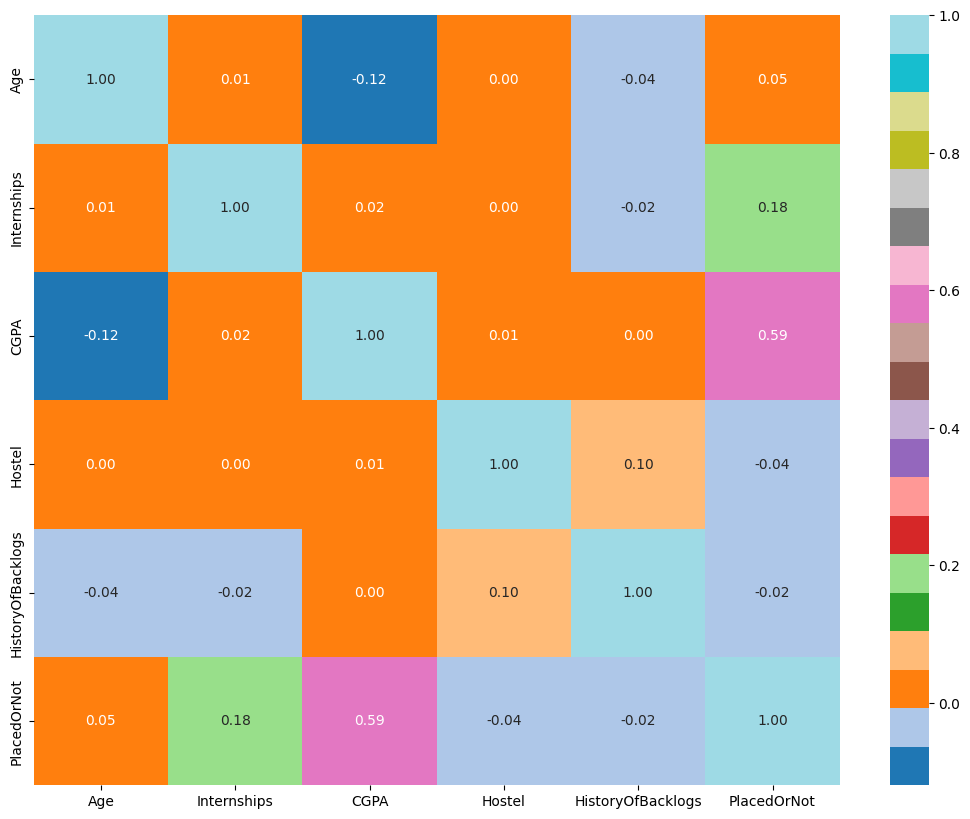

In [68]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "tab20")

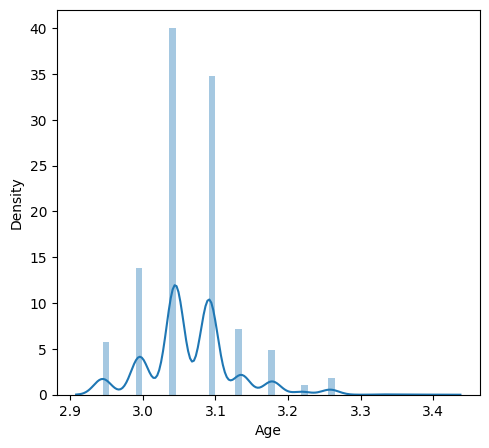

In [69]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(data['Age']))

In [70]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[['Gender']]=oe.fit_transform(data[['Gender']])
data[['Stream']]=oe.fit_transform(data[['Stream']])
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


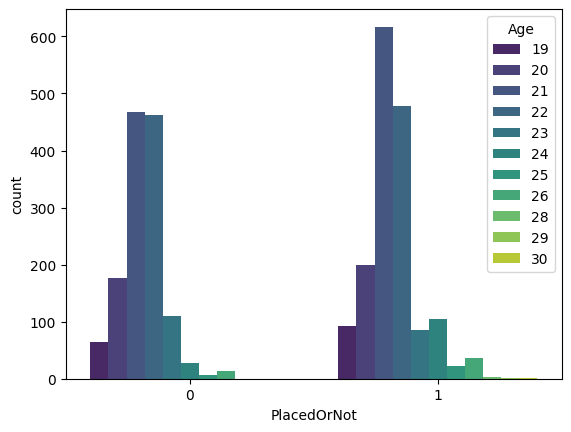

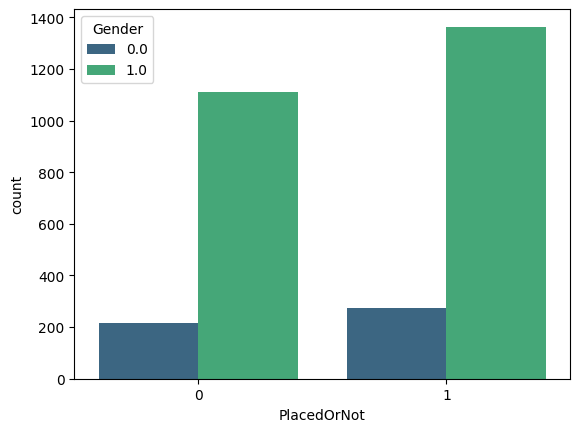

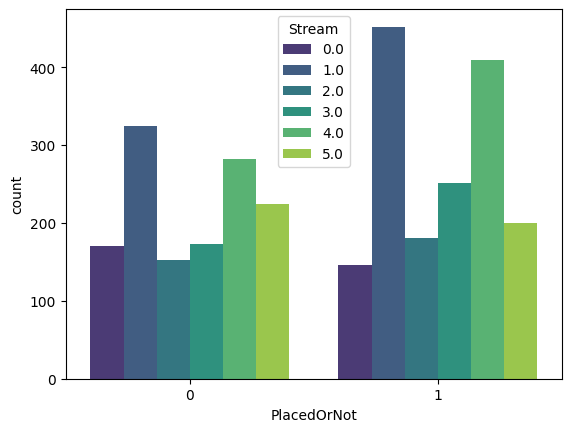

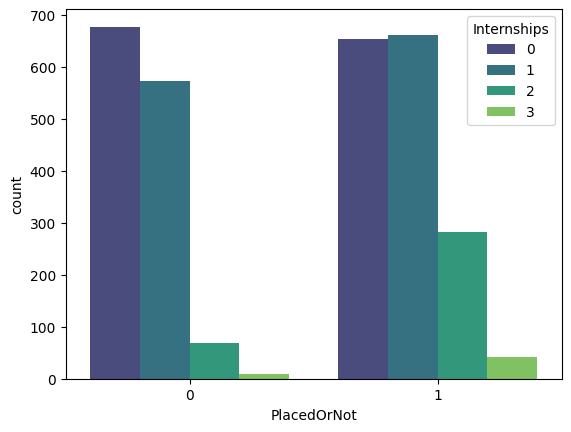

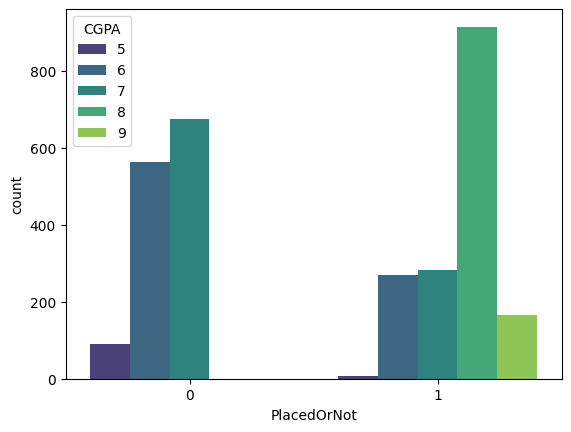

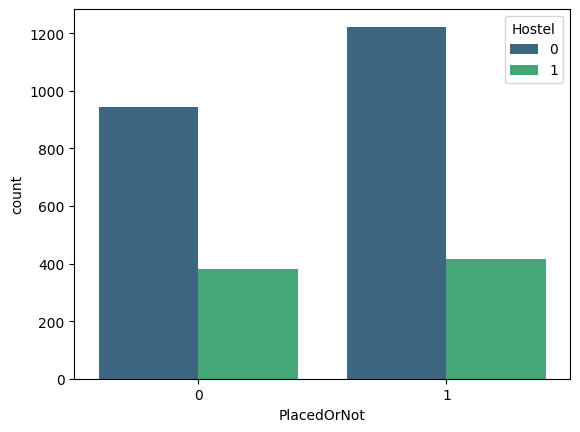

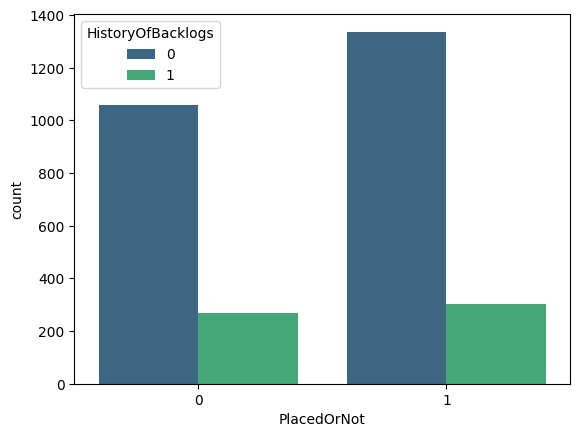

In [71]:

col_list = ['Age','Gender','Stream','Internships','CGPA','Hostel','HistoryOfBacklogs']
for g in col_list:
    sns.countplot(data = data, x = "PlacedOrNot", hue = g, palette = "viridis")
    plt.show()

In [72]:
def data_stats(data, query_col, target_col, aggregation_func=np.mean, columns_list=None):
    """
    functions describe the basic stats (count, probability) groupby operations based on query column on target column
    """
    print(f"Total placed based on {query_col} \n")
    print(pd.crosstab(data[query_col], data[target_col], margins="True"))
    print("=" * 50)
    print(f"Proportion of placed student based on {query_col} \n")
    print(
        pd.pivot_table(
            data=data,
            index=query_col,
            values=target_col,
            aggfunc=aggregation_func,
            columns=columns_list,
            sort=True,
        )
    )

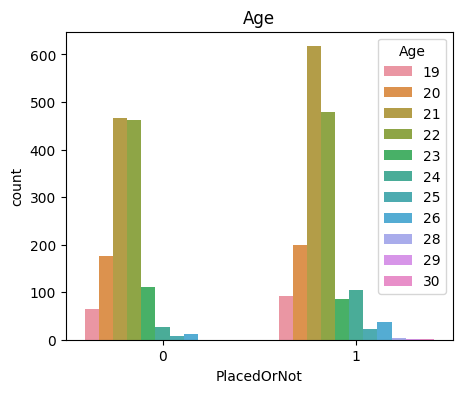

Total placed based on Age 

PlacedOrNot     0     1   All
Age                          
19             64    92   156
20            176   199   375
21            467   617  1084
22            463   478   941
23            110    85   195
24             27   104   131
25              7    22    29
26             13    37    50
28              0     3     3
29              0     1     1
30              0     1     1
All          1327  1639  2966
Proportion of placed student based on Age 

     PlacedOrNot
Age             
19      0.589744
20      0.530667
21      0.569188
22      0.507970
23      0.435897
24      0.793893
25      0.758621
26      0.740000
28      1.000000
29      1.000000
30      1.000000


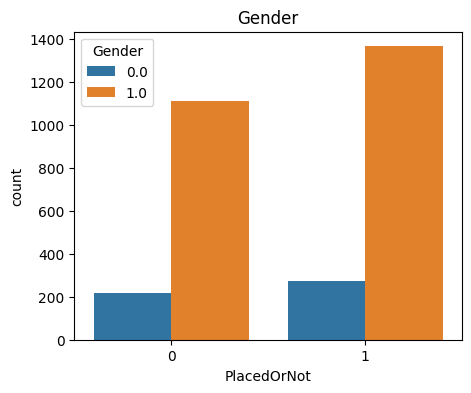

Total placed based on Gender 

PlacedOrNot     0     1   All
Gender                       
0.0           216   275   491
1.0          1111  1364  2475
All          1327  1639  2966
Proportion of placed student based on Gender 

        PlacedOrNot
Gender             
0.0        0.560081
1.0        0.551111


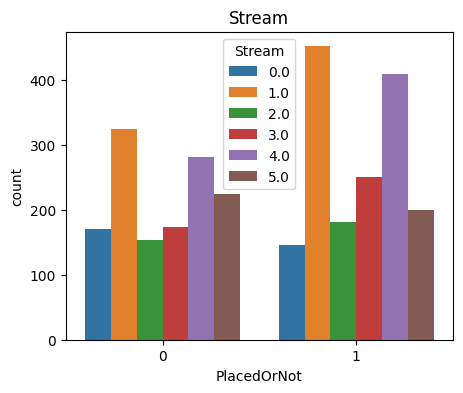

Total placed based on Stream 

PlacedOrNot     0     1   All
Stream                       
0.0           171   146   317
1.0           324   452   776
2.0           153   181   334
3.0           173   251   424
4.0           282   409   691
5.0           224   200   424
All          1327  1639  2966
Proportion of placed student based on Stream 

        PlacedOrNot
Stream             
0.0        0.460568
1.0        0.582474
2.0        0.541916
3.0        0.591981
4.0        0.591896
5.0        0.471698


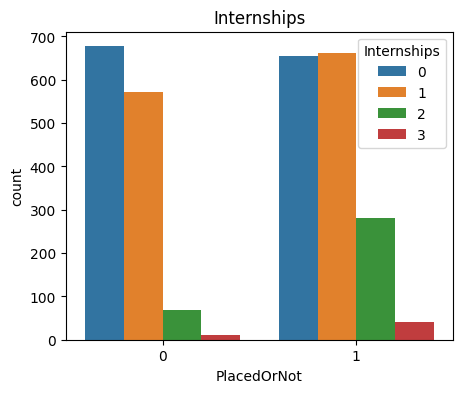

Total placed based on Internships 

PlacedOrNot     0     1   All
Internships                  
0             677   654  1331
1             572   662  1234
2              68   282   350
3              10    41    51
All          1327  1639  2966
Proportion of placed student based on Internships 

             PlacedOrNot
Internships             
0               0.491360
1               0.536467
2               0.805714
3               0.803922


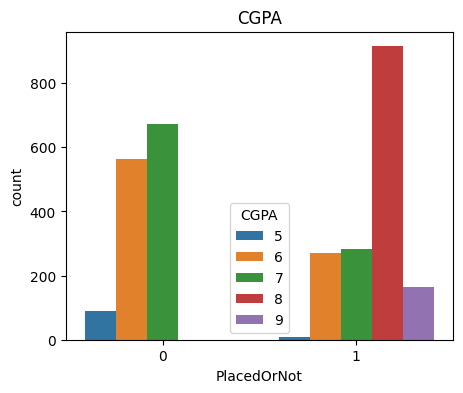

Total placed based on CGPA 

PlacedOrNot     0     1   All
CGPA                         
5              89     7    96
6             564   270   834
7             674   282   956
8               0   915   915
9               0   165   165
All          1327  1639  2966
Proportion of placed student based on CGPA 

      PlacedOrNot
CGPA             
5        0.072917
6        0.323741
7        0.294979
8        1.000000
9        1.000000


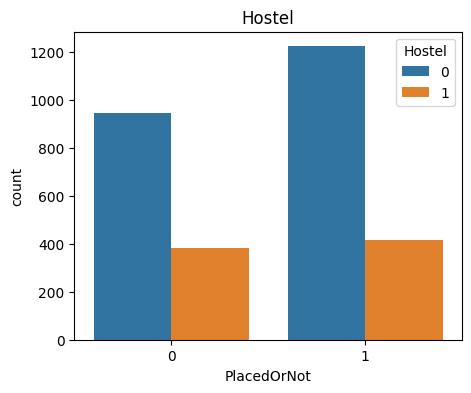

Total placed based on Hostel 

PlacedOrNot     0     1   All
Hostel                       
0             945  1223  2168
1             382   416   798
All          1327  1639  2966
Proportion of placed student based on Hostel 

        PlacedOrNot
Hostel             
0          0.564114
1          0.521303


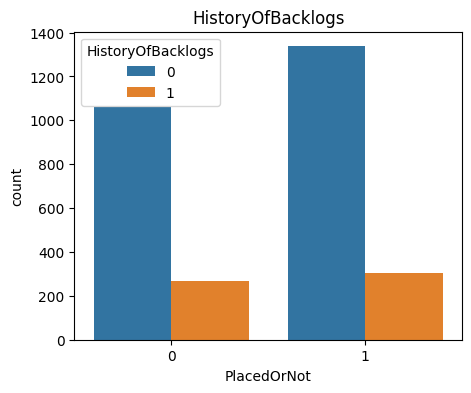

Total placed based on HistoryOfBacklogs 

PlacedOrNot           0     1   All
HistoryOfBacklogs                  
0                  1059  1337  2396
1                   268   302   570
All                1327  1639  2966
Proportion of placed student based on HistoryOfBacklogs 

                   PlacedOrNot
HistoryOfBacklogs             
0                     0.558013
1                     0.529825


In [73]:
col_list = ['Age','Gender','Stream','Internships','CGPA','Hostel','HistoryOfBacklogs']
for g in col_list:
    plt.figure(figsize=(5, 4))
    sns.countplot(
        data=data,
        x="PlacedOrNot",
        hue=g,
    )
    plt.title(f"{g}")
    plt.show()
    data_stats(data, g, "PlacedOrNot")

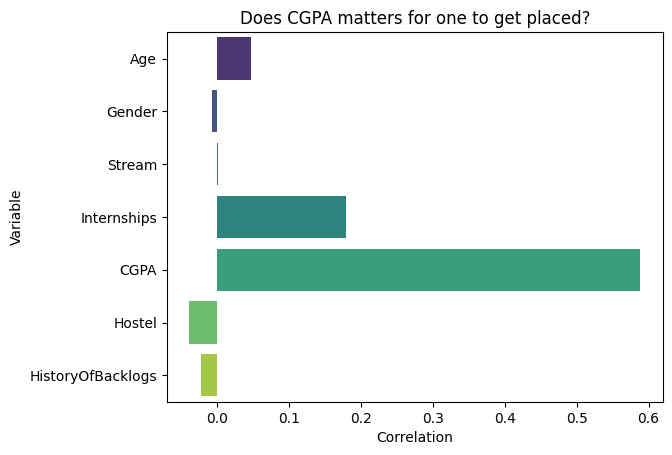

In [74]:
corr = data.corr()['PlacedOrNot'][:-1]

sns.barplot(x = corr.values, y = corr.index, palette = 'viridis')
plt.title('Does CGPA matters for one to get placed?')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()

<Axes: >

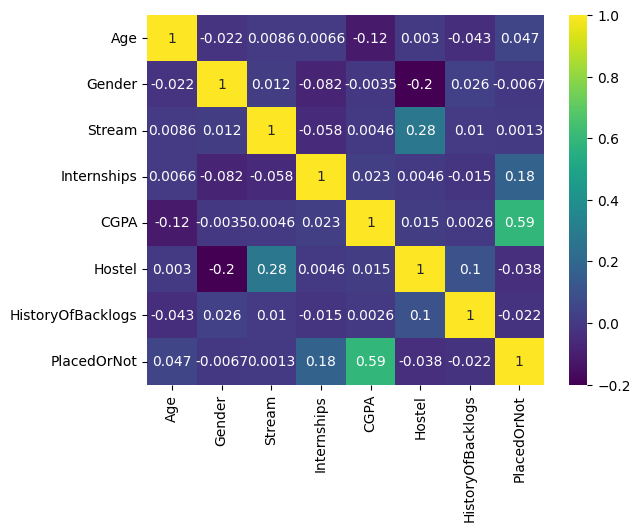

In [75]:
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

**Univariate** **analysis**


<Axes: ylabel='Density'>

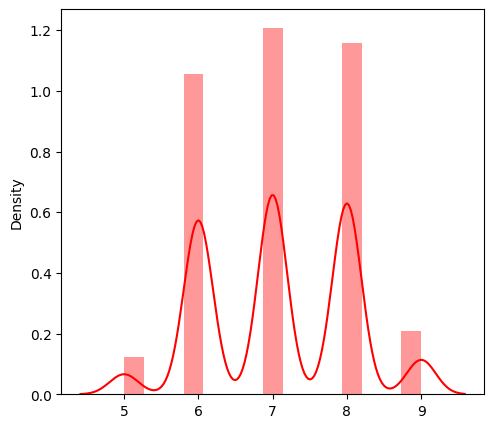

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['CGPA']],color='r')

Bivariate **Analysis**

<Axes: xlabel='PlacedOrNot', ylabel='count'>

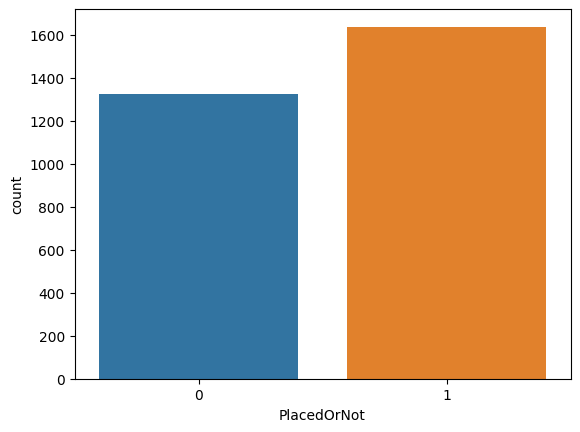

In [77]:
sns.countplot(x='PlacedOrNot',data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

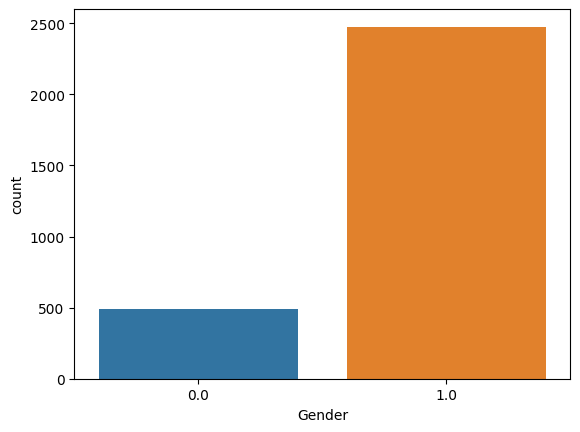

In [78]:
sns.countplot(x='Gender',data=data)

plt.show

Mutivariate Analysis

<Axes: xlabel='PlacedOrNot', ylabel='count'>

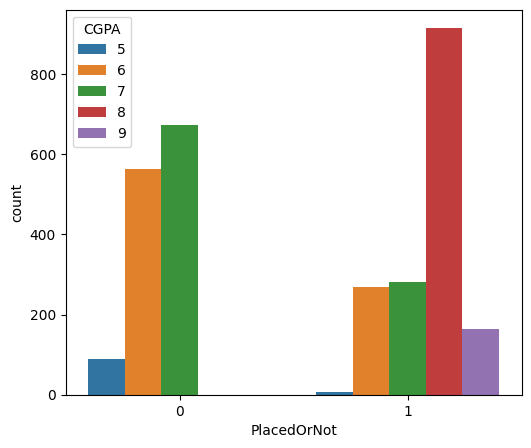

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x='PlacedOrNot',data=data,hue='CGPA')

<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

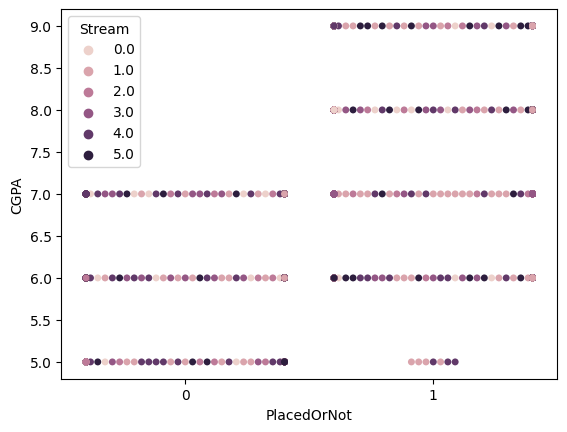

In [80]:
sns.swarmplot(x='PlacedOrNot',y='CGPA',hue='Stream',data=data)

In [81]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


Scaling

In [82]:
sc=StandardScaler()
data[['Age']]=sc.fit_transform(data[['Age']])
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0.388131,1.0,3.0,1,8,1,1,1
1,-0.366752,0.0,1.0,0,7,1,1,1
2,0.388131,0.0,4.0,1,6,0,0,1
3,-0.366752,1.0,4.0,0,8,0,1,1
4,0.388131,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0,0
2962,1.143013,1.0,5.0,1,7,1,0,0
2963,0.388131,1.0,4.0,1,7,0,0,0
2964,0.388131,1.0,1.0,1,7,0,0,0


Splotting the data into train and test

In [83]:
X=data.iloc[:,0:-1]
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,1.0,3.0,1,8,1,1
1,-0.366752,0.0,1.0,0,7,1,1
2,0.388131,0.0,4.0,1,6,0,0
3,-0.366752,1.0,4.0,0,8,0,1
4,0.388131,1.0,5.0,0,8,1,0
...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0
2962,1.143013,1.0,5.0,1,7,1,0
2963,0.388131,1.0,4.0,1,7,0,0
2964,0.388131,1.0,1.0,1,7,0,0


In [84]:
y=data.iloc[:,-1:]
y

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1
...,...
2961,0
2962,0
2963,0
2964,0


In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=16)
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
1879,0.388131,1.0,4.0,0,8,0,1
1710,0.388131,1.0,5.0,1,5,0,0
1764,1.143013,1.0,0.0,0,6,0,1
187,-0.366752,1.0,1.0,1,6,0,0
1582,-0.366752,1.0,5.0,1,5,1,0
...,...,...,...,...,...,...,...
635,0.388131,1.0,2.0,2,8,0,0
1345,2.652777,1.0,1.0,1,7,0,0
581,-0.366752,1.0,0.0,1,8,0,0
2169,0.388131,1.0,4.0,1,5,1,0


In [86]:
y_train

,PlacedOrNot
1879,1
1710,0
1764,0
187,0
1582,0
...,...
635,1
1345,1
581,1
2169,0


In [87]:
X_test

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2059,-0.366752,1.0,1.0,0,8,0,0
1004,0.388131,1.0,2.0,2,6,0,0
2173,-1.121634,0.0,1.0,0,9,1,1
994,-0.366752,1.0,4.0,1,6,1,1
890,0.388131,1.0,3.0,0,8,0,0
...,...,...,...,...,...,...,...
2003,-1.876516,1.0,1.0,0,8,0,0
1496,-0.366752,1.0,2.0,2,8,0,1
2065,-0.366752,1.0,4.0,2,7,0,1
1228,0.388131,1.0,5.0,0,9,1,1


In [88]:
y_test

,PlacedOrNot
2059,1
1004,1
2173,1
994,1
890,1
...,...
2003,1
1496,1
2065,0
1228,1


Model Building

SVM

In [89]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [90]:
pred_test=svm.predict(X_test)
pred_train=svm.predict(X_train)
train_accuracy=accuracy_score(pred_train,y_train)
test_accuracy=accuracy_score(pred_test,y_test)
print("accuracy on training data is",train_accuracy)
print("accuracy on testing data is",test_accuracy)

accuracy on training data is 0.7765598650927488
accuracy on testing data is 0.7474747474747475


AdaBoostClassifier

In [91]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

Prediction

In [92]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, pred)
print('F1-Score: %f' % f1)

Accuracy: 0.867003
Precision: 0.942953
Recall: 0.819242
F1-Score: 0.876755


Logistic Regression

In [93]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

Prediction

In [ ]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, pred)
print('F1-Score: %f' % f1)

Accuracy: 0.750842
Precision: 0.789318
Recall: 0.775510
F1-Score: 0.782353


In [94]:
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[180  71]
 [ 77 266]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       251
           1       0.79      0.78      0.78       343

    accuracy                           0.75       594
   macro avg       0.74      0.75      0.75       594
weighted avg       0.75      0.75      0.75       594



Knn

In [95]:
best_k=0
best_score=0
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train,y_train)
    knn_temp_predict=knn_temp.predict(X_test)
    score=accuracy_score(y_test,knn_temp_predict)*100
    if score>best_score and score<100:
        best_score=score
        best_k=k
print("k=",best_k)
print("accuracy=",best_score)

k= 5
accuracy= 88.04713804713805


DecisionTreeClassifier

In [96]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [97]:
print(f"Accuracy of tree Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of tree Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of tree Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of tree Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of tree Model is : 0.8737373737373737
Precision of tree Model is : 0.9379084967320261
Recall of tree Model is : 0.8367346938775511
f1_score of tree Model is : 0.884437596302003


In [98]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[232  19]
 [ 56 287]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       251
           1       0.94      0.84      0.88       343

    accuracy                           0.87       594
   macro avg       0.87      0.88      0.87       594
weighted avg       0.88      0.87      0.87       594



RandomForestClassifier

In [99]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [100]:
print(f"Accuracy of Random Forest Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(
    f"Precision of Random Forest Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of Random Forest Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of Random Forest Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of Random Forest Model is : 0.8653198653198653
Precision of Random Forest Model is : 0.9174603174603174
Recall of Random Forest Model is : 0.8425655976676385
f1_score of Random Forest Model is : 0.878419452887538


In [101]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[225  26]
 [ 54 289]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       251
           1       0.92      0.84      0.88       343

    accuracy                           0.87       594
   macro avg       0.86      0.87      0.86       594
weighted avg       0.87      0.87      0.87       594



Ann

In [102]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import BinaryCrossentropy

In [103]:
classifier=Sequential()
classifier.add(Dense(7,activation='relu',input_dim=7))
classifier.add(Dropout(0.50))
classifier.add(Dense(7,activation='relu'))
classifier.add(Dropout(0.50))
classifier.add(Dense(1,activation='sigmoid'))

In [104]:
loss1=BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss1,metrics=['accuracy'])

In [105]:
classifier.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 1.9112 - accuracy: 0.4941
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 1.3486 - accuracy: 0.4886
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.9594 - accuracy: 0.5181
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.5122
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7326 - accuracy: 0.5274
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7230 - accuracy: 0.5211
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.5341
Epoch 8/100
119/119 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.5358
Epoch 9/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5270
Epoch 10/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6916 - accura

In [106]:
pip install gradio

In [110]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def placement_model(input_data):

    knn_temp=KNeighborsClassifier(n_neighbors=best_k)
    knn_temp.fit(X_train,y_train)
    input_data_2d = np.array(input_data).reshape(1, -1)
    knn_temp_predict=knn_temp.predict(input_data_2d)

    if knn_temp_predict ==0:
        return "not placed"
    else:
        return "placed"


def preprocess_data(Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs):

    le = LabelEncoder()
    gender = le.fit_transform([Gender])[0] if Gender else 0
    stream = le.fit_transform([Stream])[0] if Stream else 0

    sc = StandardScaler()
    age = sc.fit_transform([[Age]])[0][0]

    input_data = [age, gender, stream, Internships, CGPA, Hostel, HistoryOfBacklogs]

    return input_data

inputs = ["number", "text", "text", "number", "number", "number", "number"]
outputs = "text"
gr_interface = gr.Interface(
    fn=lambda Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs:
        placement_model(preprocess_data(Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs)),
    inputs=inputs,
    outputs=outputs,
    live=True
)

gr_interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://503a376e051d401b18.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
